## Reddit Hyperlink Network Dataset

The hyperlink network represents the directed connections between two subreddits (a subreddit is a community on Reddit). We also provide subreddit embeddings. The network is extracted from publicly available Reddit data of 2.5 years from Jan 2014 to April 2017.

Subreddit Hyperlink Network: the subreddit-to-subreddit hyperlink network is extracted from the posts that create hyperlinks from one subreddit to another. We say a hyperlink originates from a post in the source community and links to a post in the target community. Each hyperlink is annotated with three properties: the timestamp, the sentiment of the source community post towards the target community post, and the text property vector of the source post. The network is directed, signed, temporal, and attributed.

Note that each post has a title and a body. The hyperlink can be present in either the title of the post or in the body. Therefore, we provide one network file for each.

The dataset is distributed as CSV file available on http://snap.stanford.edu/data/soc-RedditHyperlinks.html.

The notebook uses `soc-redditHyperlinks-body.tsv` -- Network of subreddit-to-subreddit hyperlinks extracted from hyperlinks in the body of the post.

The file contains:

 * `SOURCE_SUBREDDIT`: the subreddit where the link originates
 * `TARGET_SUBREDDIT`: the subreddit where the link ends
 * `POST_ID`: the post in the source subreddit that starts the link
 * `TIMESTAMP`: time time of the post
 * `LINK_SENTIMENT`: label indicating if the source post is explicitly negative towards the target post. The value is -1 if the source is negative towards the target, and 1 if it is neutral or positive. The label is created using crowd-sourcing and training a text based classifier, and is better than simple sentiment analysis of the posts. Please see the reference paper for details.
 * `POST_PROPERTIES`: a vector representing the text properties of the source post, listed as a list of comma separated numbers. (See the website for the complete list of properties)


In [14]:
!unzip soc-redditHyperlinks-body.tsv.zip

Archive:  soc-redditHyperlinks-body.tsv.zip
replace soc-redditHyperlinks-body.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: soc-redditHyperlinks-body.tsv  
replace __MACOSX/._soc-redditHyperlinks-body.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no


In [15]:
def parse_line(line):
    fields = line.split("\t")
    properties = fields[4].split(",")

    return (fields[0], fields[1], fields[2]), fields[0], fields[1]
#    return {"from": fields[0], "to": fields[1], "id": fields[2]}, fields[0], fields[1]

def read_graph_file(path):
    all_lines = []
    with open(path) as f:
        all_lines = f.readlines()

    all_edges = []
    all_nodes = set()
    for line in all_lines[1:]:
        single_edge, source_node, target_node = parse_line(line)
        all_nodes.add(source_node)
        all_nodes.add(target_node)
        all_edges.append(single_edge)

    return all_nodes, all_edges

all_nodes, all_edges = read_graph_file("/content/soc-redditHyperlinks-body.tsv")

In [16]:
print(f"Some of the nodes:")
for n in list(all_nodes)[:10]:
    print(f" ** {n}")

print("\n\nSome of the edges:")
for e in list(all_edges)[:10]:
    print(f" ++++ {e[0]} -> {e[1]} (edge ID: {e[2]})")

Some of the nodes:
 ** pokemongogville
 ** gta5onlinemoneyglitch
 ** crimedocumentaries
 ** mememarket
 ** punny
 ** dpla
 ** devo
 ** thinkingofharambe
 ** snoopsnoo
 ** algebra


Some of the edges:
 ++++ leagueoflegends -> teamredditteams (edge ID: 1u4nrps)
 ++++ theredlion -> soccer (edge ID: 1u4qkd)
 ++++ inlandempire -> bikela (edge ID: 1u4qlzs)
 ++++ nfl -> cfb (edge ID: 1u4sjvs)
 ++++ playmygame -> gamedev (edge ID: 1u4w5ss)
 ++++ dogemarket -> dogecoin (edge ID: 1u4w7bs)
 ++++ locationbot -> legaladvice (edge ID: 1u4wfes)
 ++++ indiefied -> aww (edge ID: 1u50pos)
 ++++ posthardcore -> bestof2013 (edge ID: 1u5ccus)
 ++++ posthardcore -> corejerk (edge ID: 1u5ccus)


In [17]:
import networkx as nx

Let's create the Graph object.

In [18]:
graph = nx.MultiDiGraph()
graph.add_nodes_from(all_nodes)
graph.add_edges_from(all_edges)
print("DONE")

DONE


## Basic Graph Manipulation

Let's redo some of the basic graph queries:

In [19]:
# size of the graph (in terms of nodes)
print("Number of nodes: {}".format(len(graph)))

# Iterate through of nodes
print("First 10 nodes in graph: {}".format([node for node in graph][:10]))

# Are nodes 'themarketplace' and 'makret_place' in the graph?
print("Node 'themarketplace' is in the graph? {}".format('themarketplace' in graph))
print("Node 'makret_place' is in the graph? {}".format('makret_place' in graph))

# Is there edge between 'leagueoflegends' -> 'teamredditteams' with ID '1u4nrps'?
print("You can get edge as graph.edges['leagueoflegends', 'teamredditteams', '1u4nrps']: {}".format(graph.edges['leagueoflegends', 'teamredditteams', '1u4nrps']))

# But non-existing edges throw errors.
try:
    print("You can get edge as graph.edges['leagueoflegends', 'teamredditteams', 'xxxxxxxx']: {}".format(graph.edges['leagueoflegends', 'teamredditteams', 'xxxxxxxx']))
except KeyError as x:
    print("The edge does not exist and throws error {}".format(x))

Number of nodes: 35776
First 10 nodes in graph: ['pokemongogville', 'gta5onlinemoneyglitch', 'crimedocumentaries', 'mememarket', 'punny', 'dpla', 'devo', 'thinkingofharambe', 'snoopsnoo', 'algebra']
Node 'themarketplace' is in the graph? True
Node 'makret_place' is in the graph? False
You can get edge as graph.edges['leagueoflegends', 'teamredditteams', '1u4nrps']: {}
The edge does not exist and throws error 'xxxxxxxx'


### All Neighbours of Selected Nodes

In [20]:
# You can iterate through all edges (here first 10):
idx = 0
for n, neighbours in graph.adjacency():
    n_ids = ["'" + str(node_id) + "'" for node_id in neighbours.keys()]
    if len(n_ids) > 0:
        print("Neighbours of node '{}' are {}".format(str(n), ", ".join(n_ids)))
    else:
        print("There are no outgoing edges from node '{}'".format(str(n)))

    idx = idx + 1
    if idx > 15:
        break

Neighbours of node 'pokemongogville' are 'thesilphroad'
Neighbours of node 'gta5onlinemoneyglitch' are 'gtamodding'
Neighbours of node 'crimedocumentaries' are 'unresolvedmysteries'
Neighbours of node 'mememarket' are 'me_irl'
Neighbours of node 'punny' are 'askhistorians', 'askreddit', 'askscience', 'showerthoughts', 'baseball'
Neighbours of node 'dpla' are 'libraries'
Neighbours of node 'devo' are 'educationalgifs', 'cyberpunk'
Neighbours of node 'thinkingofharambe' are 'funny'
Neighbours of node 'snoopsnoo' are 'quityourbullshit', 'de'
There are no outgoing edges from node 'algebra'
Neighbours of node 'fanficcrits' are 'rational'
Neighbours of node 'stemcells' are 'foregen'
Neighbours of node 'nosleepsluts' are 'aww', 'matad_crucible'
There are no outgoing edges from node 'wholesomegifs'
Neighbours of node 'emulationstation' are 'retropie', 'raspberry_pi'
Neighbours of node 'smitelft' are 'smitelfm'


# Homework - Network of Negativity

Identify the network of negativity. The dataset also contain attribute `LINK_SENTIMENT` which idetifies whether the the sentiment of the reference (post) is positive or neutral (+1) or negative (-1). Create a subgraph with only the negative links and analyse the graph. Find:

1. The two subreddits which are the most likely to express negative view on each other.
2. Find the "hubs of negativity" - the subreddits with highest betweeness, pagerank, ... centrality and describe what they mean for the network.
3. Identify positive subreddits - ones, that never get or give negative sentiment link.
4. Find cliques of negativity (subsets of subreddits that have negative links between each other).

The preffered submission is Jupyter notebook with all above questions answered, commented and supported by visualisation. Submit your notebook into GITLAB.


In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [22]:
# focus only on the links that have a negative sentiment
df = pd.read_csv('/content/soc-redditHyperlinks-body.tsv', sep='\t')
negative_sentiment_df = df[df['LINK_SENTIMENT'] == -1]

In [23]:
# subgraph containing only negative links
negative_graph = nx.DiGraph()
for index, row in negative_sentiment_df.iterrows():
    source = row['SOURCE_SUBREDDIT']
    target = row['TARGET_SUBREDDIT']
    negative_graph.add_edge(source, target)

In [24]:
# 1. The two subreddits which are the most likely to express negative view on each other.

In [25]:
# find the of negative posts coming from one sub-reddit to another
number_of_negative_links = negative_sentiment_df.groupby(['SOURCE_SUBREDDIT', 'TARGET_SUBREDDIT']).agg(counts=('SOURCE_SUBREDDIT', 'count'))

# [A, B] and [B, A] are equivelant so add their counts
counts = {}
for row in number_of_negative_links.iterrows():
    source = row[0][0]
    target = row[0][1]

    first = min(source, target)
    second = max(source, target)

    count = row[1]['counts']
    counts[(first, second)] = counts.get((first, second), 0) + count

# find the pair with the highest negative link count
most_negative_pair = max(counts.items(), key=lambda x: x[1])
print(f"The two subreddits most likely to express negative views on each other are: '{most_negative_pair[0][0]}' and '{most_negative_pair[0][1]}' with {most_negative_pair[1]} negative links")

The two subreddits most likely to express negative views on each other are: 'askreddit' and 'writingprompts' with 58 negative links


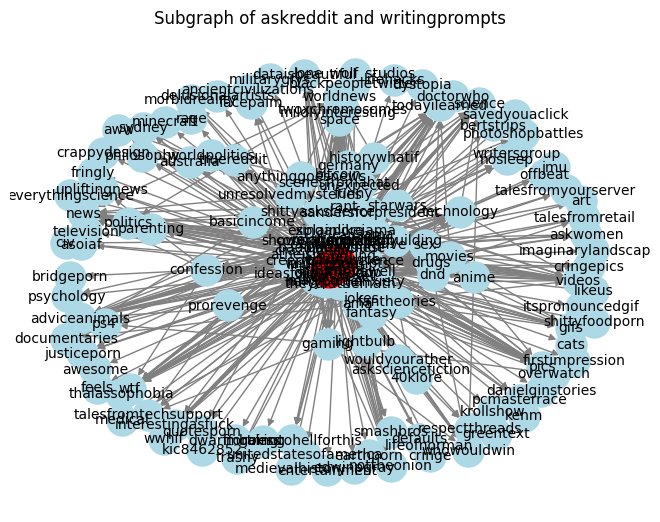

In [26]:
# geth the two nodes and their neighbors
node1 = most_negative_pair[0][0]
node2 = most_negative_pair[0][1]
neighbors1 = list(negative_graph.neighbors(node1))
neighbors2 = list(negative_graph.neighbors(node2))

# get the subgraph
subgraph_nodes = [node1, node2] + neighbors1 + neighbors2
subgraph = negative_graph.subgraph(subgraph_nodes)

# plot the subgraph
pos = nx.spring_layout(subgraph)  # You can use other layout algorithms as well
nx.draw(subgraph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, edge_color='gray')
nx.draw_networkx_nodes(subgraph, pos, nodelist=[node1, node2], node_color='red', node_size=700)
plt.title(f"Subgraph of {node1} and {node2}")
plt.show()


In [27]:
# 2. Find the "hubs of negativity" - the subreddits with highest betweeness, pagerank, ... centrality and describe what they mean for the network.

In [28]:
betweenness_centrality = nx.betweenness_centrality(negative_graph)

pagerank_scores = nx.pagerank(negative_graph)

# nodes with high betweenness centrality
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
print("nodes with high betweenness centrality:")
for node, centrality in sorted_betweenness[:10]:
    print(f"{node}: {centrality}")

print("-" * 50)

# nodes with high page rank score
sorted_pagerank = sorted(pagerank_scores.items(), key=lambda item: item[1], reverse=True)
print("nodes with high page rank score:")
for node, score in sorted_pagerank[:10]:
    print(f"{node}: {score}")

nodes with high betweenness centrality:
subredditdrama: 0.08319827407631797
askreddit: 0.062298710219235026
self: 0.019276468758104053
drama: 0.019049167979585887
conspiracy: 0.017716179744664825
writingprompts: 0.016114614161551372
leagueoflegends: 0.014837330322751535
outoftheloop: 0.013730815204153354
legaladvice: 0.012776305306232126
offmychest: 0.011797105463855434
--------------------------------------------------
nodes with high page rank score:
askreddit: 0.019529386283331014
worldnews: 0.008520134464137278
iama: 0.0075272034353001055
videos: 0.006267389279269321
news: 0.005973057321251668
todayilearned: 0.005609853718000296
funny: 0.005557476816783162
ukraine: 0.005216876044585295
pics: 0.00492870352049542
writingprompts: 0.0049106828702332505


In [29]:
# hubs of negativity are subreddits with high centrality measures and they are
# significant because they indicate groups that are invloved with other groups,
# meaning these subreddits are changing negative ideas withother peaple that can
# spread farther due to the "high connectivity" of these nodes.

In [30]:
# 3. Identify positive subreddits - ones, that never get or give negative sentiment link.

In [31]:
# find the pair with the lowest negative link count
all_nodes, all_edges = read_graph_file("/content/soc-redditHyperlinks-body.tsv")
node_counts = {}

for node in all_nodes:
    node_counts[node] = 0

# count how many times each subreddit has a negative connection
for edge in all_edges:
    source = edge[0]
    target = edge[1]
    weight = edge[2]

    if weight == -1:
        if source not in node_counts:
            node_counts[source] = 0
        if target not in node_counts:
            node_counts[target] = 0
        node_counts[source] += 1
        node_counts[target] += 1

top_positive_nodes = sorted(node_counts.items(), key=lambda x: x[1])[:10]

print("Top 10 positive nodes:")
for node, count in top_positive_nodes:
    print(f"{node}: {count}")

Top 10 positive nodes:
pokemongogville: 0
gta5onlinemoneyglitch: 0
crimedocumentaries: 0
mememarket: 0
punny: 0
dpla: 0
devo: 0
thinkingofharambe: 0
snoopsnoo: 0
algebra: 0


In [32]:
# 4. Find cliques of negativity (subsets of subreddits that have negative links between each other).

In [33]:
# cliques of negativity
# subsets of subreddits that have negative links between each other in the undirected graph
undirected_negative_graph = negative_graph.to_undirected()
cliques = list(nx.find_cliques(undirected_negative_graph))

sorted_cliques = sorted(cliques, key=len, reverse=True)

print("Top 10 cliques of negativity:")
for clique in sorted_cliques[:10]:
    print(clique)

Top 10 cliques of negativity:
['subredditdrama', 'drama', 'askreddit', 'copypasta', 'circlebroke', 'conspiracy', 'iama', 'the_donald', 'undelete', 'news', 'politics']
['subredditdrama', 'drama', 'askreddit', 'copypasta', 'bestofoutrageculture', 'conspiracy', 'undelete', 'iama', 'the_donald', 'news', 'politics']
['subredditdrama', 'drama', 'askreddit', 'circlejerkcopypasta', 'circlebroke', 'conspiracy', 'iama', 'politics', 'undelete', 'the_donald', 'news']
['subredditdrama', 'drama', 'askreddit', 'circlejerkcopypasta', 'bestofoutrageculture', 'undelete', 'conspiracy', 'iama', 'the_donald', 'news', 'politics']
['subredditdrama', 'changemyview', 'askreddit', 'circlebroke', 'circlebroke2', 'technology', 'videos', 'the_donald', 'conspiracy', 'showerthoughts']
['subredditdrama', 'changemyview', 'askreddit', 'circlebroke', 'circlebroke2', 'technology', 'videos', 'the_donald', 'conspiracy', 'iama']
['subredditdrama', 'changemyview', 'askreddit', 'circlebroke', 'politics', 'news', 'iama', 'expl